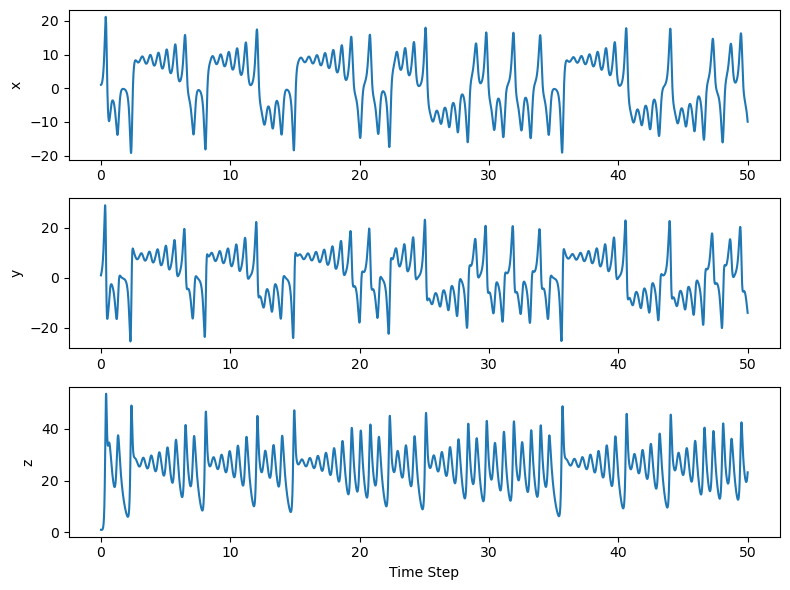

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def lorenz_step(t, x, y, z, dt, sigma, rho, beta):
    """Calculate the next step in the Lorenz system."""
    dx = sigma * (y - x) * dt
    dy = (x * (rho - z) - y) * dt
    dz = (x * y - beta * z) * dt

    return t + dt, x + dx, y + dy, z + dz


def lorenz(t0, x0, y0, z0, dt, sigma, rho, beta, iter_num):
    """Calculate the evolution of the Lorenz system."""
    t = np.zeros(iter_num + 1)
    x = np.zeros(iter_num + 1)
    y = np.zeros(iter_num + 1)
    z = np.zeros(iter_num + 1)

    t[0], x[0], y[0], z[0] = t0, x0, y0, z0
    for i in range(iter_num):
        t[i + 1], x[i + 1], y[i + 1], z[i + 1] = (
            lorenz_step(t[i], x[i], y[i], z[i], dt, sigma, rho, beta)
        )

    return t, x, y, z


t, x, y, z = lorenz(t0=0, x0=1, y0=1, z0=1, dt=0.01,
                    sigma=10, rho=28, beta=8 / 3, iter_num=5_000)

fig, axs = plt.subplots(3, 1, figsize=(8, 6))  

axs[0].plot(t, x)
axs[0].set_ylabel("x")

axs[1].plot(t, y)
axs[1].set_ylabel("y")

axs[2].plot(t, z)
axs[2].set_ylabel("z")

axs[2].set_xlabel("Time Step")

fig.tight_layout()
plt.show()

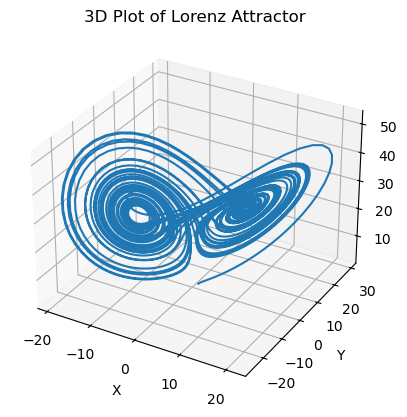

In [33]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z)
ax.set_title('3D Plot of Lorenz Attractor')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

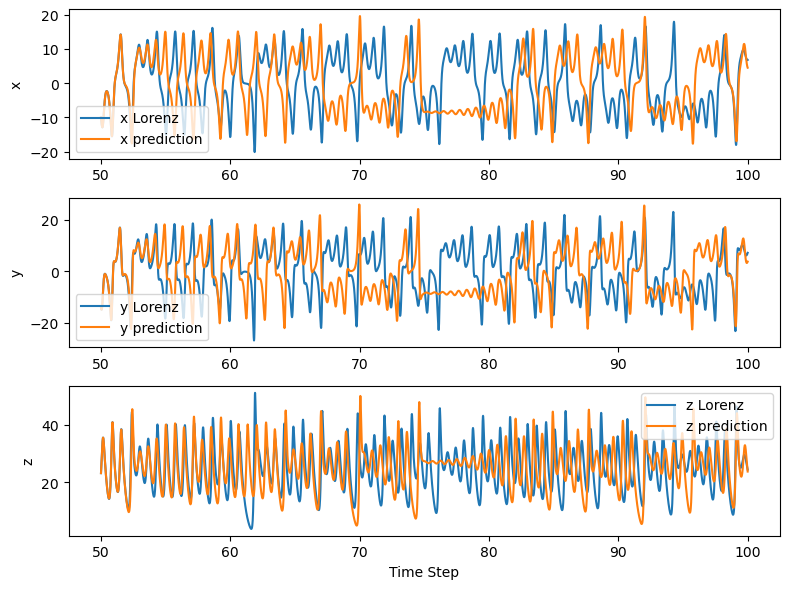

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def lorenz_step(t, x, y, z, dt, sigma, rho, beta):
    """Calculate the next step in the Lorenz system."""
    dx = sigma * (y - x) * dt
    dy = (x * (rho - z) - y) * dt
    dz = (x * y - beta * z) * dt

    return t + dt, x + dx, y + dy, z + dz


def lorenz(t0, x0, y0, z0, dt, sigma, rho, beta, iter_num):
    """Calculate the evolution of the Lorenz system."""
    t = np.zeros(iter_num + 1)
    x = np.zeros(iter_num + 1)
    y = np.zeros(iter_num + 1)
    z = np.zeros(iter_num + 1)

    t[0], x[0], y[0], z[0] = t0, x0, y0, z0
    for i in range(iter_num):
        t[i + 1], x[i + 1], y[i + 1], z[i + 1] = (
            lorenz_step(t[i], x[i], y[i], z[i], dt, sigma, rho, beta)
        )

    return t, x, y, z


def sigmoid(x):
    """Compute the sigmoid function for the input array."""
    return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))

dim_system = 3
dim_reservoir = 300
edge_probability = 0.1
scaling_factor = 1.1
iter_num = 10_000
split_ratio = 0.50
regularization_factor = 0.0001

W_in = 2 * edge_probability * (np.random.rand(dim_reservoir, dim_system) - .5)
reservoir_state = np.zeros(dim_reservoir)

graph = nx.gnp_random_graph(dim_reservoir, edge_probability)
graph = nx.to_numpy_array(graph)
A = 2 * (np.random.rand(dim_reservoir, dim_reservoir) - 0.5) * graph
eigenvalues, _ = np.linalg.eig(A)
A = A / np.absolute(np.amax(eigenvalues)) * scaling_factor

W_out = np.zeros((dim_system, dim_reservoir))

t, x, y, z = lorenz(t0=0, x0=1, y0=1, z0=1, dt=0.01, sigma=10, rho=28, beta=8 / 3, iter_num=iter_num)

xyz = list(zip(x, y, z))

split_idx = int(iter_num * split_ratio)
t_train, xyz_train = t[:split_idx], np.array(xyz[:split_idx])
t_val, xyz_val = t[split_idx:], np.array(xyz[split_idx:])

R = np.zeros((dim_reservoir, xyz_train.shape[0]))
for i in range(xyz_train.shape[0]):
    R[:, i] = reservoir_state
    reservoir_state = sigmoid(np.dot(A, reservoir_state)
                              + np.dot(W_in, xyz_train[i]))

Rt = np.transpose(R)
regularization_factor = 0.0001
inverse_part = np.linalg.inv(np.dot(R, Rt)
                             + regularization_factor * np.identity(R.shape[0]))
W_out = np.dot(np.dot(xyz_train.T, Rt), inverse_part) # Ridge Regression

step_to_be_predicted = len(xyz_val)

xyz_pred = np.zeros((step_to_be_predicted, dim_system))
for i in range(step_to_be_predicted):
    xyz_pred[i] = np.dot(W_out, reservoir_state)
    reservoir_state = sigmoid(np.dot(A, reservoir_state)
                              + np.dot(W_in, xyz_pred[i]))

x_val, y_val, z_val = xyz_val[:, 0], xyz_val[:, 1], xyz_val[:, 2]
x_pred, y_pred, z_pred = xyz_pred[:, 0], xyz_pred[:, 1], xyz_pred[:, 2]

fig, axs = plt.subplots(3, 1, figsize=(8, 6))

axs[0].plot(t_val, x_val, label="x Lorenz")
axs[0].plot(t_val, x_pred, label="x prediction")
axs[0].set_ylabel("x")
axs[0].legend()

axs[1].plot(t_val, y_val, label="y Lorenz")
axs[1].plot(t_val, y_pred, label="y prediction")
axs[1].set_ylabel("y")
axs[1].legend()

axs[2].plot(t_val, z_val, label="z Lorenz")
axs[2].plot(t_val, z_pred, label="z prediction")
axs[2].set_ylabel("z")
axs[2].legend()

axs[2].set_xlabel("Time Step")

fig.tight_layout()
plt.show()


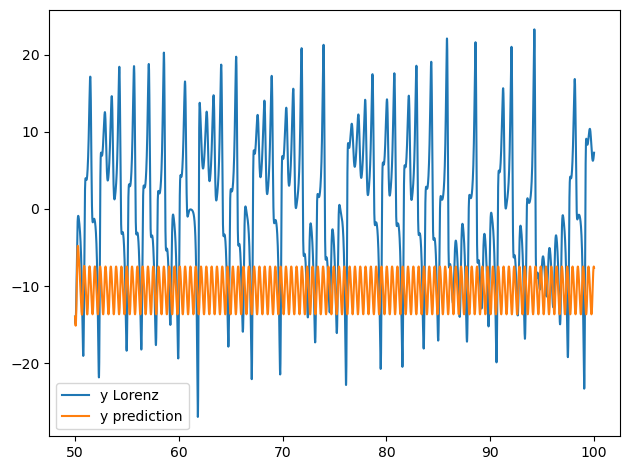

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def lorenz_step(t, x, y, z, dt, sigma, rho, beta):
    """Calculate the next step in the Lorenz system."""
    dx = sigma * (y - x) * dt
    dy = (x * (rho - z) - y) * dt
    dz = (x * y - beta * z) * dt

    return t + dt, x + dx, y + dy, z + dz


def lorenz(t0, x0, y0, z0, dt, sigma, rho, beta, iter_num):
    """Calculate the evolution of the Lorenz system."""
    t = np.zeros(iter_num + 1)
    x = np.zeros(iter_num + 1)
    y = np.zeros(iter_num + 1)
    z = np.zeros(iter_num + 1)

    t[0], x[0], y[0], z[0] = t0, x0, y0, z0
    for i in range(iter_num):
        t[i + 1], x[i + 1], y[i + 1], z[i + 1] = (
            lorenz_step(t[i], x[i], y[i], z[i], dt, sigma, rho, beta)
        )

    return t, x, y, z


def sigmoid(x):
    """Compute the sigmoid function for the input array."""
    return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))

dim_system = 1
dim_reservoir = 300
edge_probability = 0.1
scaling_factor = 1.1
iter_num = 10_000
split_ratio = 0.50
regularization_factor = 0.0001

W_in = 2 * edge_probability * (np.random.rand(dim_reservoir, dim_system) - .5)
reservoir_state = np.zeros(dim_reservoir)

graph = nx.gnp_random_graph(dim_reservoir, edge_probability)
graph = nx.to_numpy_array(graph)
A = 2 * (np.random.rand(dim_reservoir, dim_reservoir) - 0.5) * graph
eigenvalues, _ = np.linalg.eig(A)
A = A / np.absolute(np.amax(eigenvalues)) * scaling_factor

W_out = np.zeros((dim_system, dim_reservoir))

t, x, y, z = lorenz(t0=0, x0=1, y0=1, z0=1, dt=0.01, sigma=10, rho=28, beta=8 / 3, iter_num=iter_num)

split_idx = int(iter_num * split_ratio)
t_train, y_train = t[:split_idx], np.array(y[:split_idx])
t_val, y_val = t[split_idx:], np.array(y[split_idx:])

R = np.zeros((dim_reservoir, y_train.shape[0]))
for i in range(y_train.shape[0]):
    R[:, i] = reservoir_state
    reservoir_state = sigmoid(np.dot(A, np.expand_dims(reservoir_state, axis=1))
                              + np.dot(W_in, y_train[i]))
    reservoir_state = reservoir_state[:, 0]

Rt = np.transpose(R)
regularization_factor = 0.0001
inverse_part = np.linalg.inv(np.dot(R, Rt)
                             + regularization_factor * np.identity(R.shape[0]))
W_out = np.dot(np.dot(y_train.T, Rt), inverse_part)

step_to_be_predicted = len(y_val)

y_pred = np.zeros((step_to_be_predicted, dim_system))
for i in range(step_to_be_predicted):
    y_pred[i] = np.dot(W_out, reservoir_state)
    reservoir_state = sigmoid(np.dot(A, reservoir_state)
                              + np.dot(W_in, y_pred[i]))

plt.plot(t_val, y_val, label="y Lorenz")
plt.plot(t_val, y_pred, label="y prediction")
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def lorenz_step(t, x, y, z, dt, sigma, rho, beta):
    """Calculate the next step in the Lorenz system."""
    dx = sigma * (y - x) * dt
    dy = (x * (rho - z) - y) * dt
    dz = (x * y - beta * z) * dt

    return t + dt, x + dx, y + dy, z + dz


def lorenz(t0, x0, y0, z0, dt, sigma, rho, beta, iter_num):
    """Calculate the evolution of the Lorenz system."""
    t = np.zeros(iter_num + 1)
    x = np.zeros(iter_num + 1)
    y = np.zeros(iter_num + 1)
    z = np.zeros(iter_num + 1)

    t[0], x[0], y[0], z[0] = t0, x0, y0, z0
    for i in range(iter_num):
        t[i + 1], x[i + 1], y[i + 1], z[i + 1] = (
            lorenz_step(t[i], x[i], y[i], z[i], dt, sigma, rho, beta)
        )

    return t, x, y, z


def sigmoid(x):
    """Compute the sigmoid function for the input array."""
    return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))


def find_divergence_point(array1, array2, threshold):
    # Calculate the absolute difference between the arrays
    differences = np.abs(array1 - array2)

    # Find the first index where the difference exceeds the threshold
    divergent_indices = np.where(differences > threshold)[0]

    if divergent_indices.size > 0:
        return divergent_indices[0]
    else:
        return -1  # Return -1 if no divergence is found


dim_system = 1
dim_reservoir = 300
edge_probability = 0.1
scaling_factor = 1.1
iter_num = 10_000
split_ratio = 0.50
regularization_factor = 0.0001
repetitions = 30  # repeat times of singular value
loop_time = 30

time_to_divergence = np.zeros(loop_time)
desired_max_singular_value_all = np.zeros(loop_time)
divergence_times = np.zeros((loop_time, repetitions))

t, x, y, z = lorenz(t0=0, x0=1, y0=1, z0=1, dt=0.01, sigma=10, rho=28, beta=8 / 3, iter_num=iter_num)

for j in range(loop_time):
    desired_max_singular_value = j * 0.1 # sigular value from 0 to 3
    desired_max_singular_value_all[j] = desired_max_singular_value

    for rep in range(repetitions):

        W_in = 2 * edge_probability * (np.random.rand(dim_reservoir, dim_system) - 0.5)
        reservoir_state = np.zeros(dim_reservoir)

        graph = nx.gnp_random_graph(dim_reservoir, edge_probability)
        graph = nx.to_numpy_array(graph)

        A = 2 * (np.random.rand(dim_reservoir, dim_reservoir) - 0.5) * graph
        U, S, Vt = np.linalg.svd(A, full_matrices=False)
        S = S / S.max() * desired_max_singular_value
        A = np.dot(U, np.dot(np.diag(S), Vt))

        W_out = np.zeros((dim_system, dim_reservoir))

        split_idx = int(iter_num * split_ratio)
        t_train, x_train = t[:split_idx], np.array(x[:split_idx])
        t_val, x_val = t[split_idx:], np.array(x[split_idx:])

        R = np.zeros((dim_reservoir, x_train.shape[0]))
        for i in range(x_train.shape[0]):
            R[:, i] = reservoir_state
            reservoir_state = sigmoid(np.dot(A, np.expand_dims(reservoir_state, axis=1))
                                      + np.dot(W_in, x_train[i]))
            reservoir_state = reservoir_state[:, 0]

        Rt = np.transpose(R)
        inverse_part = np.linalg.inv(np.dot(R, Rt)
                                     + regularization_factor * np.identity(R.shape[0]))
        W_out = np.dot(np.dot(x_train.T, Rt), inverse_part)

        step_to_be_predicted = len(x_val)
        x_pred = np.zeros((step_to_be_predicted, dim_system))
        for i in range(step_to_be_predicted):
            x_pred[i] = np.dot(W_out, reservoir_state)
            reservoir_state = sigmoid(np.dot(A, reservoir_state)
                                      + np.dot(W_in, x_pred[i]))
        x_pred_squeezed = x_pred.squeeze()

        divergence_times[j, rep] = find_divergence_point(x_val, x_pred_squeezed, 3)

    time_to_divergence[j] = np.mean(divergence_times[j])
    print(f"Epoch {j + 1}/{loop_time} completed")

Epoch 1/30 completed
Epoch 2/30 completed
Epoch 3/30 completed
Epoch 4/30 completed
Epoch 5/30 completed
Epoch 6/30 completed
Epoch 7/30 completed
Epoch 8/30 completed
Epoch 9/30 completed
Epoch 10/30 completed
Epoch 11/30 completed
Epoch 12/30 completed
Epoch 13/30 completed
Epoch 14/30 completed
Epoch 15/30 completed
Epoch 16/30 completed
Epoch 17/30 completed
Epoch 18/30 completed
Epoch 19/30 completed
Epoch 20/30 completed
Epoch 21/30 completed
Epoch 22/30 completed
Epoch 23/30 completed
Epoch 24/30 completed
Epoch 25/30 completed
Epoch 26/30 completed
Epoch 27/30 completed
Epoch 28/30 completed
Epoch 29/30 completed
Epoch 30/30 completed


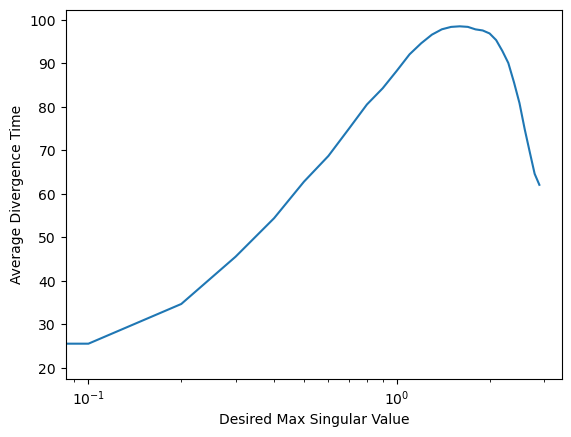

In [16]:
import matplotlib.ticker as ticker
from scipy.ndimage import uniform_filter1d

smoothed_data = uniform_filter1d(time_to_divergence, size=5)
plt.plot(desired_max_singular_value_all, smoothed_data)
plt.xlabel('Desired Max Singular Value')
plt.ylabel('Average Divergence Time')
plt.xscale('log', base=10)
plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10))
plt.show()

0.0804482111159493


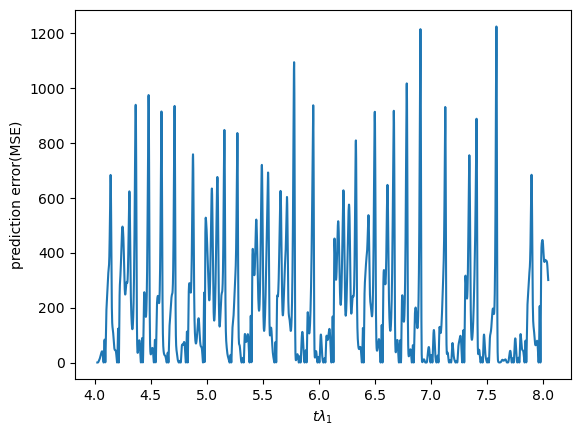

In [29]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import nolds


def lorenz_step(t, x, y, z, dt, sigma, rho, beta):
    """Calculate the next step in the Lorenz system."""
    dx = sigma * (y - x) * dt
    dy = (x * (rho - z) - y) * dt
    dz = (x * y - beta * z) * dt

    return t + dt, x + dx, y + dy, z + dz


def lorenz(t0, x0, y0, z0, dt, sigma, rho, beta, iter_num):
    """Calculate the evolution of the Lorenz system."""
    t = np.zeros(iter_num + 1)
    x = np.zeros(iter_num + 1)
    y = np.zeros(iter_num + 1)
    z = np.zeros(iter_num + 1)

    t[0], x[0], y[0], z[0] = t0, x0, y0, z0
    for i in range(iter_num):
        t[i + 1], x[i + 1], y[i + 1], z[i + 1] = (
            lorenz_step(t[i], x[i], y[i], z[i], dt, sigma, rho, beta)
        )

    return t, x, y, z


def sigmoid(x):
    """Compute the sigmoid function for the input array."""
    return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))


def calculate_lyapunov(axis):

    lyapunov_exponent = nolds.lyap_r(axis, emb_dim=3, lag=1, min_tsep=50, tau=1, min_neighbors=20, trajectory_len=20)
    return lyapunov_exponent

dim_system = 1
dim_reservoir = 300
edge_probability = 0.1
scaling_factor = 1.1
iter_num = 10_000
split_ratio = 0.50
regularization_factor = 0.0001

W_in = 2 * edge_probability * (np.random.rand(dim_reservoir, dim_system) - .5)
reservoir_state = np.zeros(dim_reservoir)

graph = nx.gnp_random_graph(dim_reservoir, edge_probability)
graph = nx.to_numpy_array(graph)
A = 2 * (np.random.rand(dim_reservoir, dim_reservoir) - 0.5) * graph
eigenvalues, _ = np.linalg.eig(A)
A = A / np.absolute(np.amax(eigenvalues)) * scaling_factor

W_out = np.zeros((dim_system, dim_reservoir))

t, x, y, z = lorenz(t0=0, x0=1, y0=1, z0=1, dt=0.01, sigma=10, rho=28, beta=8 / 3, iter_num=iter_num)

split_idx = int(iter_num * split_ratio)
t_train, y_train = t[:split_idx], np.array(y[:split_idx])
t_val, y_val = t[split_idx:], np.array(y[split_idx:])

R = np.zeros((dim_reservoir, y_train.shape[0]))
for i in range(y_train.shape[0]):
    R[:, i] = reservoir_state
    reservoir_state = sigmoid(np.dot(A, np.expand_dims(reservoir_state, axis=1))
                              + np.dot(W_in, y_train[i]))
    reservoir_state = reservoir_state[:, 0]

Rt = np.transpose(R)
regularization_factor = 0.0001
inverse_part = np.linalg.inv(np.dot(R, Rt)
                             + regularization_factor * np.identity(R.shape[0]))
W_out = np.dot(np.dot(y_train.T, Rt), inverse_part)

step_to_be_predicted = len(y_val)

y_pred = np.zeros((step_to_be_predicted, dim_system))
for i in range(step_to_be_predicted):
    y_pred[i] = np.dot(W_out, reservoir_state)
    reservoir_state = sigmoid(np.dot(A, reservoir_state)
                              + np.dot(W_in, y_pred[i]))
    y_pred_squeezed = y_pred.squeeze()

my_lambda = calculate_lyapunov(x)
print(my_lambda)


plt.plot(t_val * my_lambda, (y_val - y_pred_squeezed) ** 2)
plt.xlabel(r'$t\lambda_{1}$')
plt.ylabel(r'prediction error(MSE)')
plt.show()